In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [43]:
prices = pd.read_csv("../data/processed/prices_final.csv", header=[0, 1],index_col=0)
benchmark = pd.read_csv("../data/processed/benchmark_final.csv", header=[0, 1],index_col=0)

prices

Price            Close                                                 \
Ticker            AAPL        AMZN        BAC         CAT         CVX   
Date                                                                    
2010-01-04    6.418385    6.695000  12.169186   39.290596   41.669117   
2010-01-05    6.429479    6.734500  12.564741   39.760315   41.964283   
2010-01-06    6.327211    6.612500  12.712109   39.881123   41.969528   
2010-01-07    6.315515    6.500000  13.130936   40.042160   41.811428   
2010-01-08    6.357501    6.676000  13.014596   40.491783   41.885220   
...                ...         ...        ...         ...         ...   
2024-12-23  254.120682  225.059998  42.896484  359.954315  136.635986   
2024-12-24  257.037476  229.050003  43.375397  362.101868  137.467438   
2024-12-26  257.853790  227.050003  43.541546  361.658539  137.601242   
2024-12-27  254.439224  223.750000  43.336300  359.432159  137.620346   
2024-12-30  251.064484  221.300003  42.916031  357.609711  136.731552   

Price                                                                   ...  \
Ticker           GOOGL         JNJ         JPM         MMM        MSFT  ...   
Date                                                                    ...   
2010-01-04   15.566815   40.418434   28.552135   42.972546   23.130053  ...   
2010-01-05   15.498263   39.949776   29.105200   42.703388   23.137526  ...   
2010-01-06   15.107573   40.274723   29.265116   43.308998   22.995537  ...   
2010-01-07   14.755876   39.987259   29.844816   43.340057   22.756392  ...   
2010-01-08   14.952587   40.124741   29.771532   43.645443   22.913315  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  193.870712  140.955261  233.448151  126.589981  432.062744  ...   
2024-12-24  195.344955  141.518036  237.286880  127.944420  436.112885  ...   
2024-12-26  194.836945  141.256042  238.099686  128.749207  434.901794  ...   
2024-12-27  192.008011  140.741791  236.170517  127.767731  427.377319  ...   
2024-12-30  190.493942  139.082565  234.358871  126.737198  421.719055  ...   

Price          Volume                                                   \
Ticker          GOOGL       JNJ       JPM      MMM      MSFT       PFE   
Date                                                                     
2010-01-04   78169752   9506200  35460500  3640265  38409100  54898644   
2010-01-05  120067812  10673100  41208300  3405012  49749600  45714931   
2010-01-06  158988852  13171500  27729000  6301126  58182400  43640975   
2010-01-07  256315428  10901600  44864700  5346240  50559700  41557112   
2010-01-08  188783028   7898000  33110100  4073337  51197400  32049716   
...               ...       ...       ...      ...       ...       ...   
2024-12-23   25675000   8720800   8611500  2067400  19152500  35350400   
2024-12-24   10403300   3164100   3729100   803200   7164500  19716400   
2024-12-26   12046600   4656300   4451800  1484900   8194200  31406000   
2024-12-27   18891400   5588300   5730200  1842600  18117700  35218300   
2024-12-30   14264700   6268700   5723800  2154000  13158700  32859100   

Price                                              
Ticker           PG       WFC       WMT       XOM  
Date                                               
2010-01-04  9190800  39335700  62259300  27809100  
2010-01-05  8649400  55416000  46945200  30174700  
2010-01-06  9908400  33237000  37551600  35044700  
2010-01-07  8972800  61649000  31988100  27192100  
2010-01-08  8464600  35508700  34089600  24891800  
...             ...       ...       ...       ...  
2024-12-23  6983900  11817000  26205400  12285100  
2024-12-24  2460800   4442700   8992400   7807000  
2024-12-26  3629400   6964300  10994000   9652400  
2024-12-27  4367900   7219500  11384400  11943900  
2024-12-30  4354500   8443800   9790200  11080800  

[3773 rows x 30 columns]

In [44]:
# Risk Analysis : 

# In finance risk is equal to loss possibility + uncertainty
# For measuring 'RISK' we measure three parameters : 
# a. Volatility()
# b. Rolling volatility
# c. Downside risk

In [45]:
# 1. Volatility : Gives the measure of up's and down's of daily returns.
# e.g = Stable stock → low volatility, Jumpy stock → high volatility
# Note : Volatility does not tell about loss, it tells about the uncertainity.
# 2. Rolling Volatility : Timing of risk
# 3. Downside risk : Tells the intensity of the loss.

In [46]:
# Calculating returns for risk : 

returns = prices.pct_change().dropna()
benchmark_returns = benchmark.pct_change().dropna()
# dropna() : used to remove rows or colums that contain missing values (represented as NaN, None, or NaT). 

In [47]:
# Finding Volatility : using mathematical formula ===> annual_volatility = daily_volatility * √252
# daily_volatility = volatility means how much returns fluctuate, the simple mathematical measure of fluctuation is standard deviation
# Variance : Wrong units, poor interpretability
# Interquartile Range (IQR) : Ignores tails, breaks models

# Use Standard Deviation when:

# Measuring risk
# Comparing assets
# Doing portfolio optimization
# Computing Sharpe / Sortino
# CAPM / factor models

volatility = returns.std() * np.sqrt(252)
benchmark_volatility = benchmark_returns.std() * np.sqrt(252)

volatility.sort_values(ascending=False)

C:\Users\Varun Gupta\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Price   Ticker
Volume  MMM       7.455991
        WMT       7.395353
        CAT       7.047997
        PFE       6.811223
        PG        6.660053
        AMZN      6.592000
        JNJ       6.515815
        CVX       6.507397
        WFC       6.351032
        MSFT      6.334563
        GOOGL     6.309001
        BAC       6.210053
        JPM       6.027277
        AAPL      5.839200
        XOM       5.400077
Close   BAC       0.336133
        AMZN      0.327263
        WFC       0.299187
        CAT       0.290468
        AAPL      0.278659
        JPM       0.277708
        GOOGL     0.273335
        CVX       0.267791
        MSFT      0.255752
        XOM       0.249586
        MMM       0.232333
        PFE       0.217837
        WMT       0.191874
        PG        0.170920
        JNJ       0.167057
dtype: float64

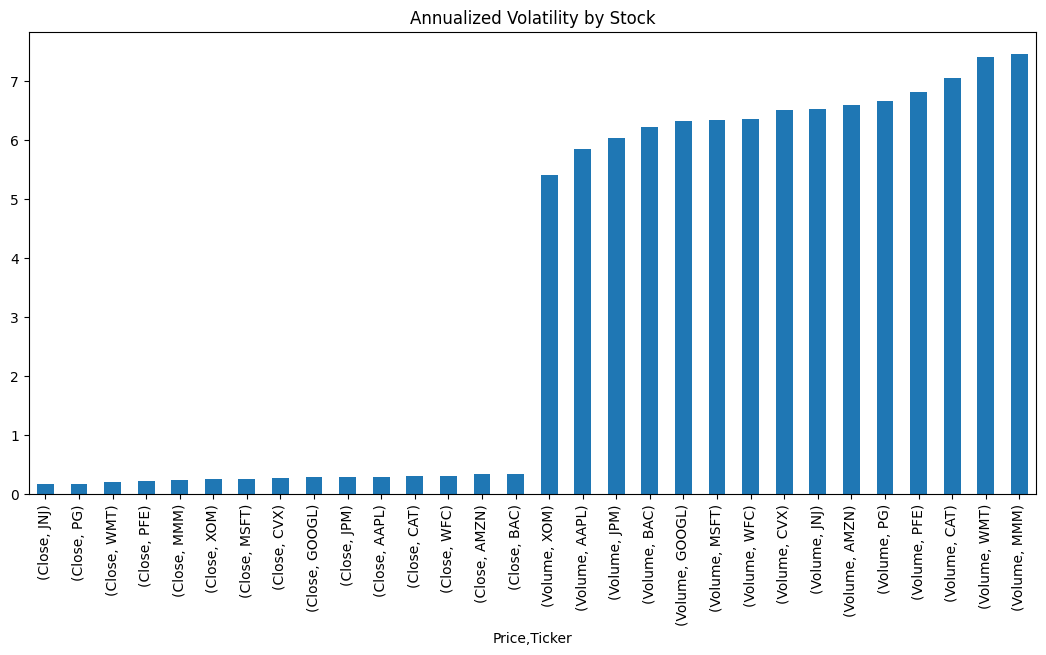

In [48]:
volatility.sort_values().plot(kind='bar', figsize=(13,6), title="Annualized Volatility by Stock")
plt.show()

In [49]:
# Consclusions : 

#& 1. Stock price volatility is relatively low and tightly clustered :
    #^ All Close (price) volatilities lie in a narrow band
    #^ No stock shows extreme price volatility compared to others

#& 2. Volume volatility is massively higher than price volatility :
    #^ All Volume bars are orders of magnitude higher
    #^ Confirms that trading activity fluctuates far more than prices

#& 3. Risk differentiation across stocks is limited at long-term average level :
    #^ Volatility differences exist, but no single stock is an extreme outlier

In [50]:
# Rolling Volatility : 
# .rollign() is just like cumulative but here operation window is manipulated unlike cumulative where it gives from start to end

rolling_volat = returns.rolling(window=252).std() * np.sqrt(252)
benchmark_rolling_volat = benchmark_returns.rolling(252).std() * np.sqrt(252)

<Axes: title={'center': 'Benchmark Rolling Volatility (1Y)'}>

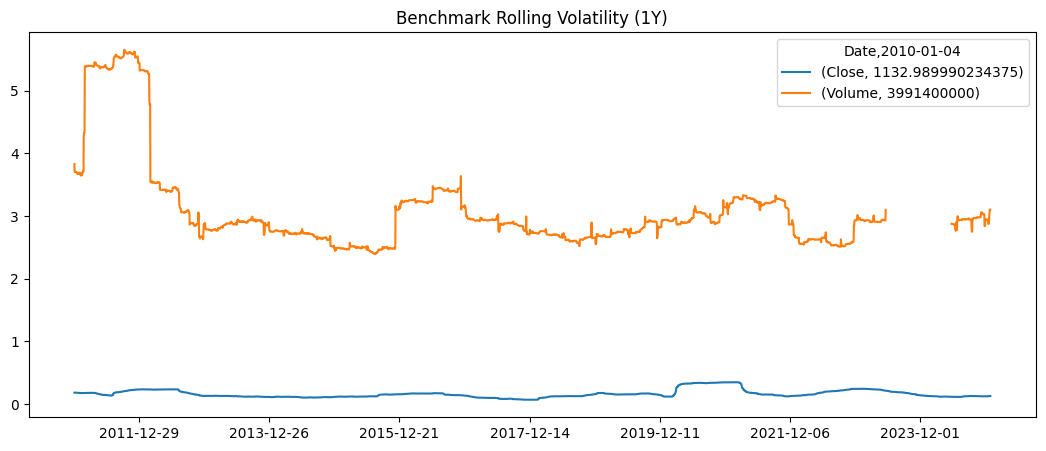

In [51]:
benchmark_rolling_volat.plot(figsize=(13,5), title="Benchmark Rolling Volatility (1Y)")

In [52]:
# Conclusions : 

# 🔵 Blue line :
    #* Rolling volatility of benchmark PRICE returns
    #* This is the actual market risk line
    #* This is the line that matters for COVID detection
# Around early 2020, there is a noticeable upward jump

# 🟠 Orange line :
    # ⁡⁢⁣⁣Rolling volatility of benchmark VOLUME
    # This is NOT market price risk
    # This line shows trading activity instability, not returns risk⁡

#& 1. Sharp volatility spike around 2020 :
    #^ Rolling volatility jumps suddenly and strongly
    #^ Spike is clearly isolated and temporary

#& 2. Risk is time-varying, not constant :
    #^ Calm periods → low volatility
    #^ Stress periods → sudden volatility explosions

#& 3. Post-crisis normalization :
    #^ After spike, volatility falls back toward historical range
    #^ Confirms market recovery

<Axes: title={'center': 'Annualized Downside Volatility'}, xlabel='Price,Ticker'>

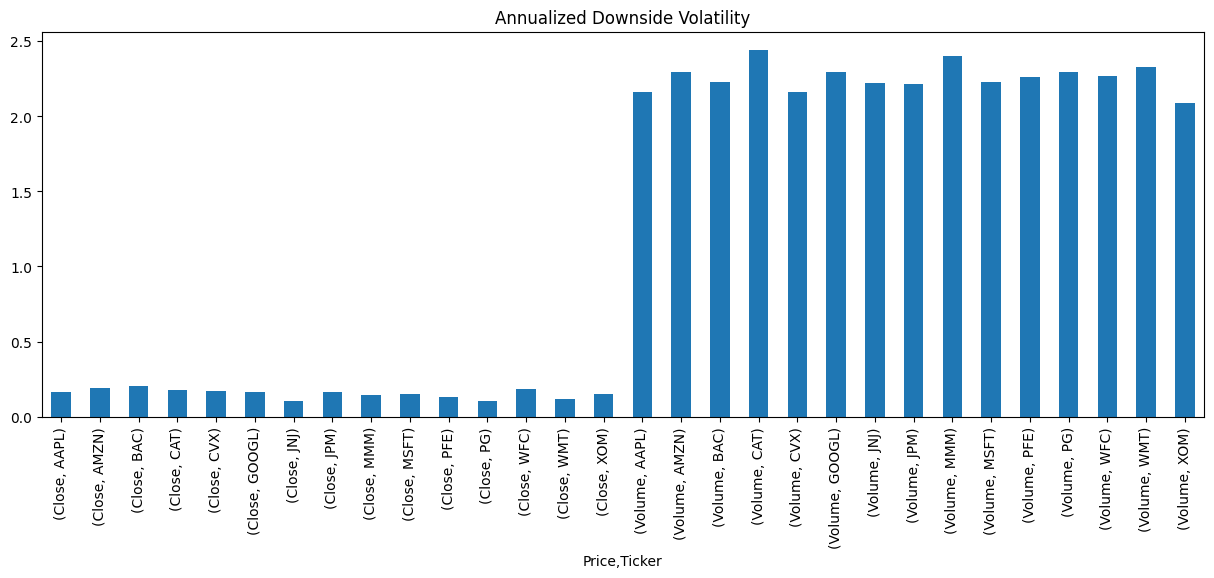

In [53]:
# Downside Analysis :

downside_returns = returns.copy()
downside_returns[downside_returns > 0] = 0

downside_risk = downside_returns.std() * np.sqrt(252)
downside_risk.plot(kind='bar', figsize=(15,5), title="Annualized Downside Volatility")

In [54]:
# Conclusions : 

#& 1. Downside risk differs materially across stocks :
    #* Even when overall volatility looked similar (Graph 1)
    #* Loss-side behavior is not the same

#& 2. Some stocks experience deeper losses when markets fall :
    #* Higher downside volatility = more painful drawdowns
    #* Indicates asymmetric risk profiles

#& 3. Downside risk is lower than total volatility :
    #* Confirms that gains partially offset losses in normal periods

### DRAWDOWN & STRESS ANALYSIS :

In [55]:
# DAILY RETURNS :

returns = prices.pct_change().dropna()
benchmark_returns = benchmark.pct_change().dropna()

# CUMULATIVE WEALTH SERIES :
# We simulate: ₹1 invested from start — how it grows over time

cumulative_wealth = (1 + returns).cumprod()
benchmark_wealth = (1 + benchmark_returns).cumprod()

C:\Users\Varun Gupta\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


In [56]:
# Computing drawdown series : To measure distance from that peak
# A drawdown series in finance refers to the sequence of peak-to-trough declines
# in an investment's value over time, revealing its historical volatility and potential for loss.

running_max = cumulative_wealth.cummax()     # .cummax() : calculates the running maximum of a dataset
drawdown = (cumulative_wealth - running_max) / running_max

benchmark_running_max = benchmark_wealth.cummax()
benchmark_drawdown = (benchmark_wealth - benchmark_running_max) / benchmark_running_max

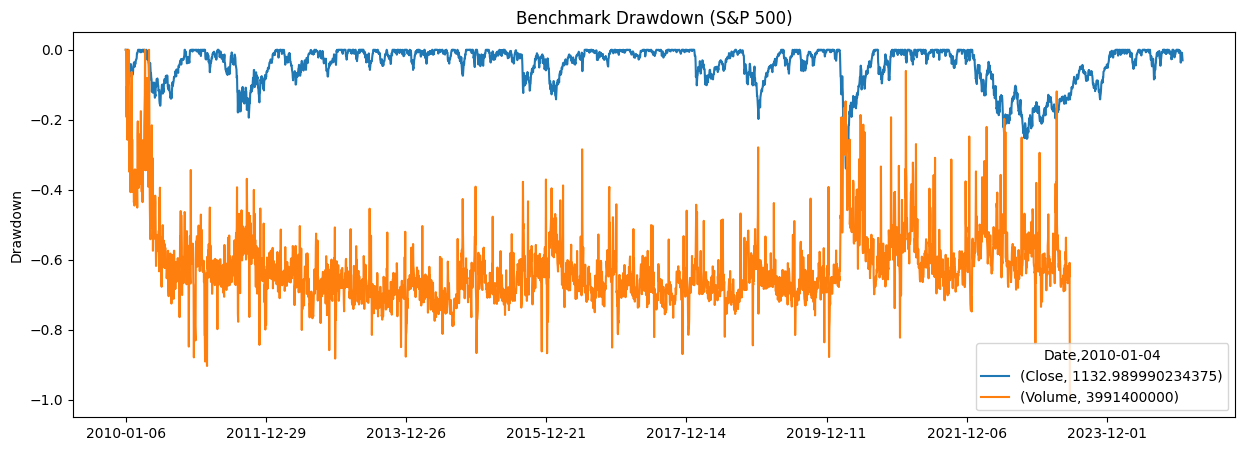

In [57]:
benchmark_drawdown.plot(figsize=(15,5), title="Benchmark Drawdown (S&P 500)")
plt.ylabel("Drawdown")
plt.show()


In [58]:
# Conclusions : 

# 1. The benchmark experienced its most severe and sudden drawdown during the early-2020 period,
# followed by a faster recovery compared to other drawdown episodes. This is where COVID is visible

# 2. volume drawdown behaves very differently from price

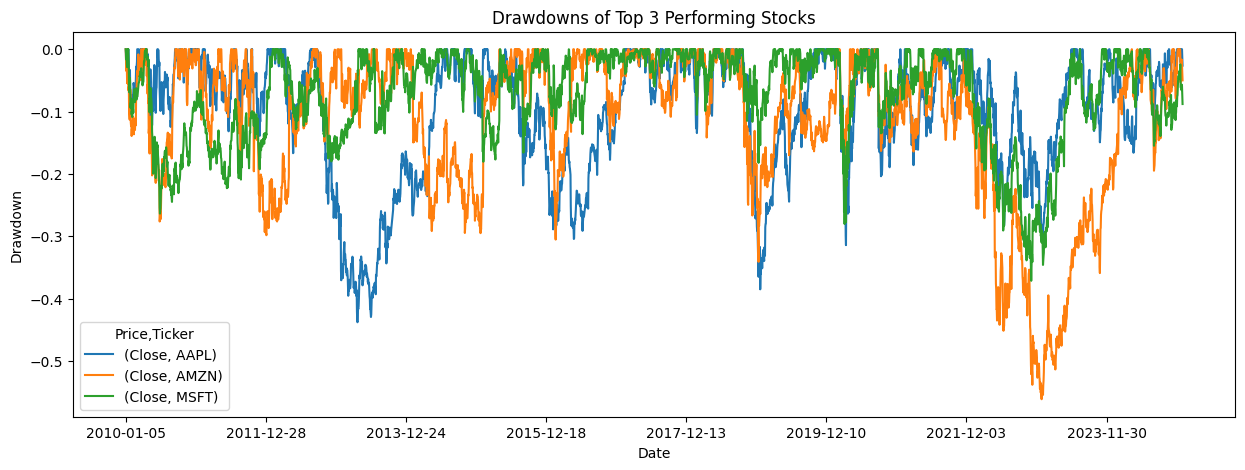

In [59]:
# Finding top stocks drawdown : 

top_stocks = cumulative_wealth.iloc[-1].sort_values(ascending=False).head(3).index

drawdown[top_stocks].plot(figsize=(15,5), title="Drawdowns of Top 3 Performing Stocks")
plt.ylabel("Drawdown")
plt.show()


In [60]:
# Conclusions :

# All stocks show synchronized drawdowns around early-2020
# All three lines dip at the same time
# Confirms systemic market shock

# AAPL experienced moderate drawdowns with relatively quick recoveries, indicating strong resilience during stress periods.
# Despite strong long-term performance, AMZN exhibited the most severe and prolonged drawdown during the covid crisis,
# implying higher downside risk.

# MSFT demonstrated the strongest downside protection among the top performers, with smaller drawdowns and quicker recovery.

In [61]:
# Finding maximum drawdown for each stock : 
# Tells about a stock that how much the stock goes down at ever
max_drawdown = drawdown.min()
benchmark_max_drawdown = benchmark_drawdown.min()


In [62]:
max_drawdown.sort_values()

Price   Ticker
Volume  AAPL     -0.987648
        MMM      -0.986710
        BAC      -0.985977
        JPM      -0.985179
        GOOGL    -0.984281
        PG       -0.983658
        CAT      -0.982794
        PFE      -0.982698
        AMZN     -0.982311
        JNJ      -0.979090
        MSFT     -0.977563
        WMT      -0.974093
        WFC      -0.970363
        XOM      -0.967368
        CVX      -0.961584
Close   BAC      -0.742005
        WFC      -0.644571
        XOM      -0.623960
        MMM      -0.590973
        AMZN     -0.561453
        CVX      -0.557739
        PFE      -0.548180
        CAT      -0.446325
        GOOGL    -0.443200
        AAPL     -0.437972
        JPM      -0.436265
        MSFT     -0.371485
        WMT      -0.364352
        JNJ      -0.273663
        PG       -0.254642
dtype: float64

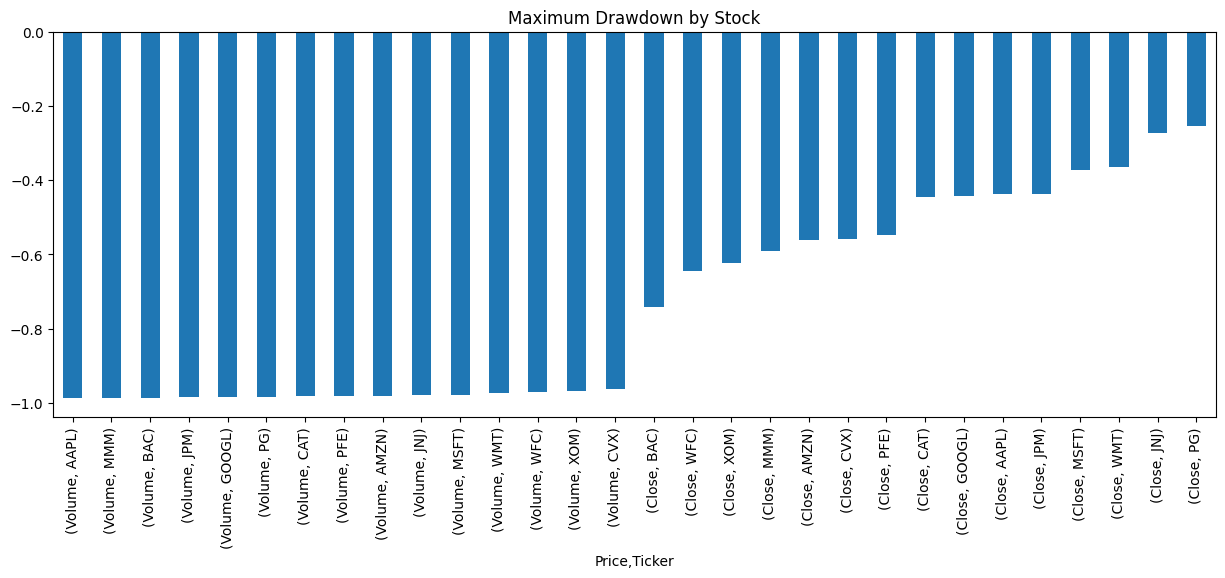

In [63]:
max_drawdown.sort_values().plot(kind="bar", figsize=(15,5), title="Maximum Drawdown by Stock")
plt.show()
# Longer bar → worse crash, Compare against benchmark


In [64]:
# Conclusions :

# Visually confirms volume drawdowns are extreme and not comparable.
# NJ, PG, WMT : smallest drawdowns
# AMZN, CVX, MMM : deeper drawdowns
# Defensive stocks cluster on the right (less negative)

In [65]:

#^ RISK-ADJUSTED PERFORMANCE:

# Alone return is a lie, risk adjusted return corrected that lie
# Checking : Was the extra return actually worth the extra pain?

# We measure the risk-adjusted performance using three factors :
# Sharpe Ratio : reward per unit of total risk
# Sortino Ratio : reward per unit of downside risk
# Comparison vs Benchmark

In [66]:

#& What sharpe ratio gives : for every unit of volatility i tolerated, how much return did i get?
#⁡⁢⁣⁣ Sharpe = (Average Return − Risk-Free Rate) / Volatility
# If sharpe ratio is higher then it is good to take that risk...⁡

#& What Sortino ratio gives : for every unit of downside risk, how much return did i get?

In [67]:
from src.config import Trading_Days, Risk_Free_Rate

In [68]:
# Finding annual return and annual_volatility : 

annual_returns = returns.mean()*Trading_Days
annual_volatility = returns.std()*np.sqrt(Trading_Days)

### Sharpe Ratio : 

In [69]:
# Now finding sharpe ratio :
sharpe_ratio = (annual_returns - Risk_Free_Rate) / annual_volatility
sharpe_ratio.sort_values(ascending=False)

# Annualization ensures comparability
# Uses same scale for all assets
# Matches industry convention
 

Price   Ticker
Volume  CAT       2.615614
        MMM       2.437265
        GOOGL     2.432549
        AMZN      2.409710
        PG        2.350289
        WMT       2.340871
        WFC       2.325664
        BAC       2.320195
        PFE       2.299911
        JPM       2.264048
        MSFT      2.243515
        JNJ       2.231699
        AAPL      2.214431
        XOM       2.127541
        CVX       2.062851
Close   AAPL      0.947077
        AMZN      0.816455
        MSFT      0.808333
        GOOGL     0.675333
        WMT       0.665471
        CAT       0.584720
        JPM       0.573156
        PG        0.532864
        JNJ       0.458158
        WFC       0.382265
        BAC       0.359174
        CVX       0.356458
        MMM       0.340647
        PFE       0.313884
        XOM       0.309865
dtype: float64

### Sortino Ratio : 

In [70]:
# Downside deviation :
downside_deviation = downside_returns.std() * np.sqrt(Trading_Days)

In [71]:
# Finding sortino ratio :
sortino_ratio = (annual_returns - Risk_Free_Rate) / downside_deviation
sortino_ratio.sort_values(ascending=False)


Price   Ticker
Volume  MMM       7.564627
        CAT       7.549731
        WMT       7.425917
        PFE       6.928531
        AMZN      6.920537
        PG        6.824865
        GOOGL     6.678985
        JNJ       6.546742
        WFC       6.518726
        BAC       6.457458
        MSFT      6.382903
        CVX       6.203075
        JPM       6.167737
        AAPL      5.989386
        XOM       5.500581
Close   AAPL      1.584359
        AMZN      1.389651
        MSFT      1.351325
        GOOGL     1.129308
        WMT       1.087449
        CAT       0.966586
        JPM       0.953390
        PG        0.870839
        JNJ       0.743274
        WFC       0.630986
        BAC       0.595910
        CVX       0.569857
        MMM       0.549038
        PFE       0.534771
        XOM       0.512036
dtype: float64

In [72]:
# BENCHMARK SHARPE & SORTINO :
benchmark_annual_return = benchmark_returns.mean() * Trading_Days
benchmark_vol = benchmark_returns.std() * np.sqrt(Trading_Days)

benchmark_sharpe = (benchmark_annual_return - Risk_Free_Rate) / benchmark_vol


C:\Users\Varun Gupta\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [73]:
benchmark_downside = benchmark_returns.copy()
benchmark_downside[benchmark_downside > 0] = 0

benchmark_sortino = (
    (benchmark_annual_return - Risk_Free_Rate) /
    (benchmark_downside.std() * np.sqrt(Trading_Days))
)


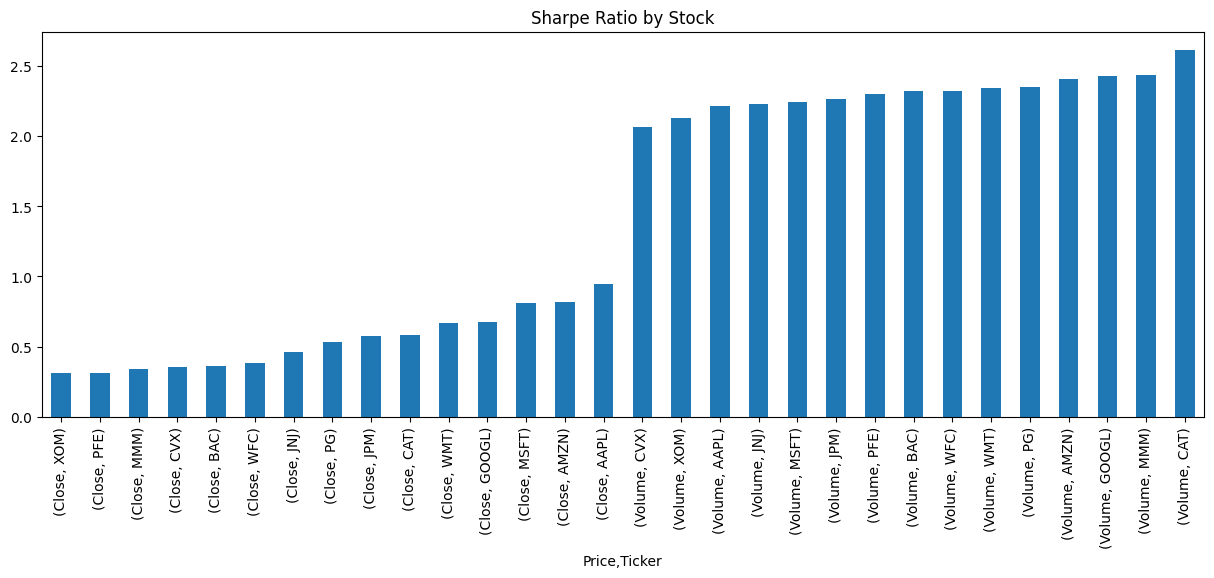

In [74]:
# Plotting sharpe ratio and sortino ratio : 

sharpe_ratio.sort_values().plot(kind="bar", figsize=(15,5), title="Sharpe Ratio by Stock")
plt.show()


In [75]:
# Conclusions : 
# Among equities, technology-oriented stocks exhibit superior risk-adjusted performance
# relative to energy and defensive sectors.
# The sharp break in Sharpe ratios confirms that price and volume 
# must not be analyzed together under the same risk-adjusted metric.

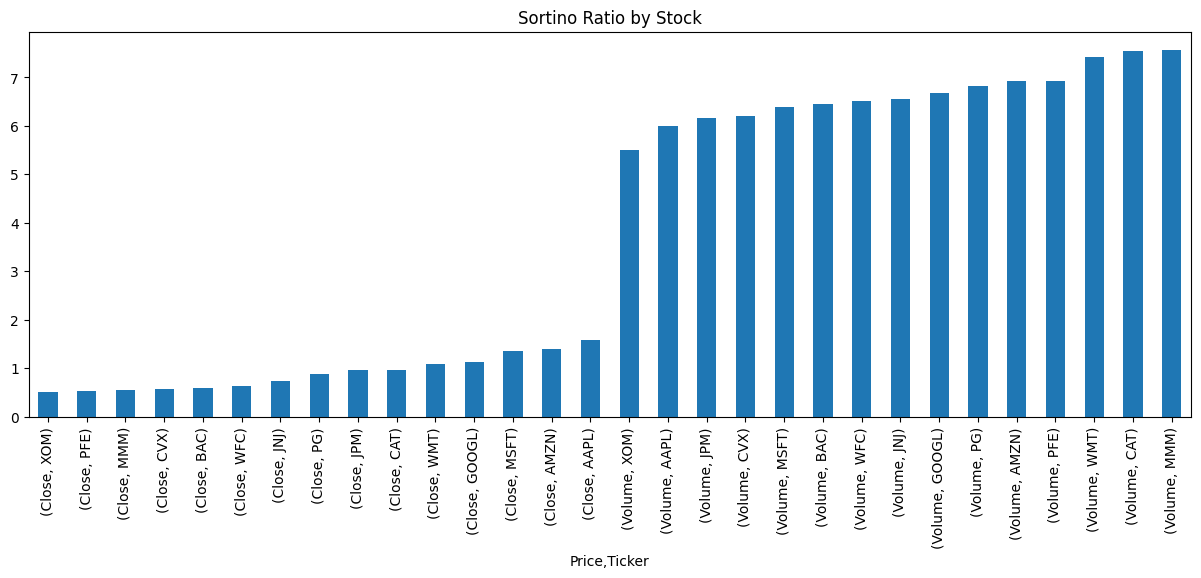

In [76]:
sortino_ratio.sort_values().plot(kind="bar", figsize=(15,5), title="Sortino Ratio by Stock")
plt.show()


In [77]:
# Conclusions : 
# Several stocks exhibit significantly better downside-risk efficiency than total-risk efficiency,
# indicating that their volatility is primarily upside-driven.
# Volume series display extremely high Sortino ratios due to asymmetric distributions 
# and should not be interpreted as investment performance metrics.

# From bar heights among Close only:
# Top tier: AAPL, MSFT, AMZN
# Bottom tier: XOM, PFE, MMM
# Stocks that showed higher drawdowns earlier continue to underperform on downside-adjusted metrics.

# Note : Risk-adjusted ratios should NEVER be computed on volume data. Which can be proved by graph as :
# Volume-based Sharpe ratios dominate the ranking with unrealistically high values,
# indicating that Sharpe ratio is not economically meaningful when applied to volume data.

In [78]:
# Freezing of imp data : 

benchmark_returns.to_csv("../data/processed/benchmark_returns_final.csv", index=True)